In [1]:
import pandas as pd
import os
import re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

data_dir = '../data/datasets/MELD'
train_path = os.path.join(data_dir, 'train_sent_emo.csv')
dev_path = os.path.join(data_dir, 'dev_sent_emo.csv')
test_path = os.path.join(data_dir, 'test_sent_emo.csv')

def load_and_clean(path):
    df = pd.read_csv(path)
    df = df.dropna(subset=['Utterance', 'Emotion'])
    unwanted = ['non-neutral']  # Filter if needed
    df = df[~df['Emotion'].isin(unwanted)]
    return df

train_df = load_and_clean(train_path)
dev_df = load_and_clean(dev_path)
test_df = load_and_clean(test_path)

print("Shapes:", train_df.shape, dev_df.shape, test_df.shape)


Shapes: (9989, 11) (1109, 11) (2610, 11)


In [2]:
def clean_text(text):
    # Lowercase and remove non-alphabet characters except spaces
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply cleaning
train_df['Cleaned_Utterance'] = train_df['Utterance'].apply(clean_text)
dev_df['Cleaned_Utterance'] = dev_df['Utterance'].apply(clean_text)
test_df['Cleaned_Utterance'] = test_df['Utterance'].apply(clean_text)

# Display sample cleaned text
train_df[['Utterance', 'Cleaned_Utterance']].head()


,Utterance,Cleaned_Utterance
0,also I was the point person on my companys tr...,also i was the point person on my companys tra...
1,You mustve had your hands full.,you mustve had your hands full
2,That I did. That I did.,that i did that i did
3,So lets talk a little bit about your duties.,so lets talk a little bit about your duties
4,My duties? All right.,my duties all right


In [3]:
all_emotions = sorted(train_df['Emotion'].unique())
label2id = {label: idx for idx, label in enumerate(all_emotions)}
id2label = {idx: label for label, idx in label2id.items()}

train_df['label'] = train_df['Emotion'].map(label2id)
dev_df['label'] = dev_df['Emotion'].map(label2id)
test_df['label'] = test_df['Emotion'].map(label2id)

print("Emotion to label mapping:", label2id)


Emotion to label mapping: {'anger': 0, 'disgust': 1, 'fear': 2, 'joy': 3, 'neutral': 4, 'sadness': 5, 'surprise': 6}


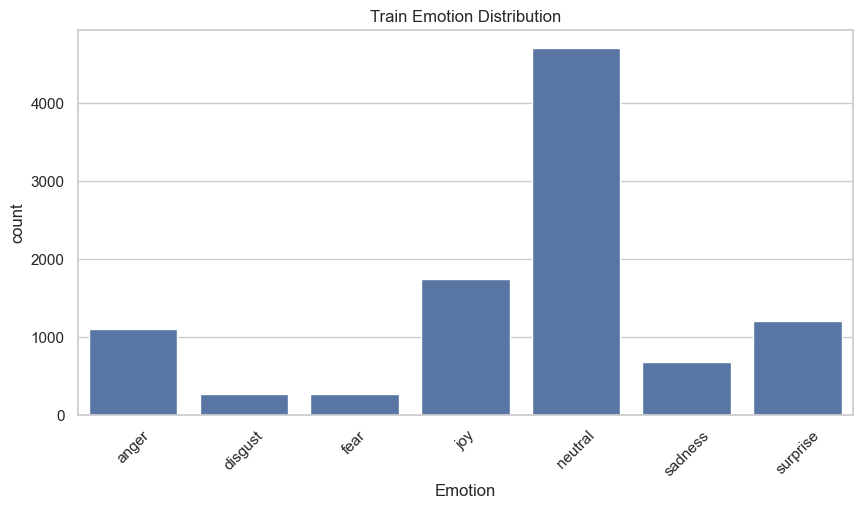

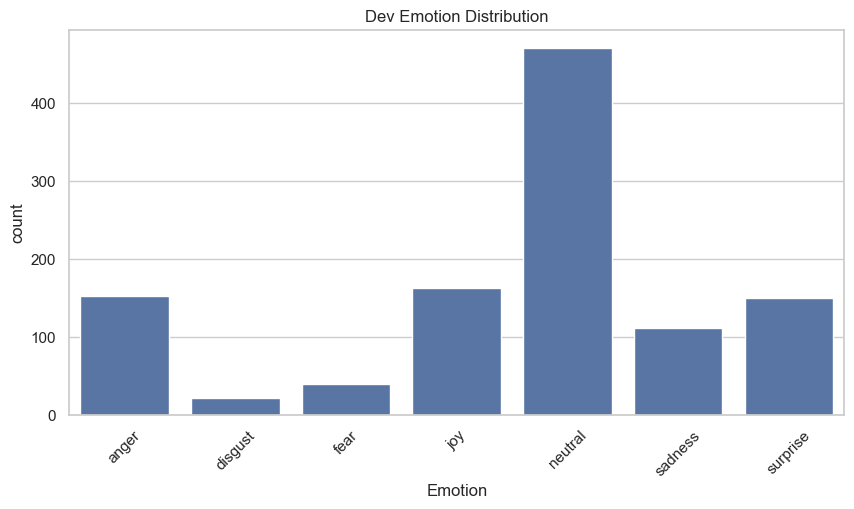

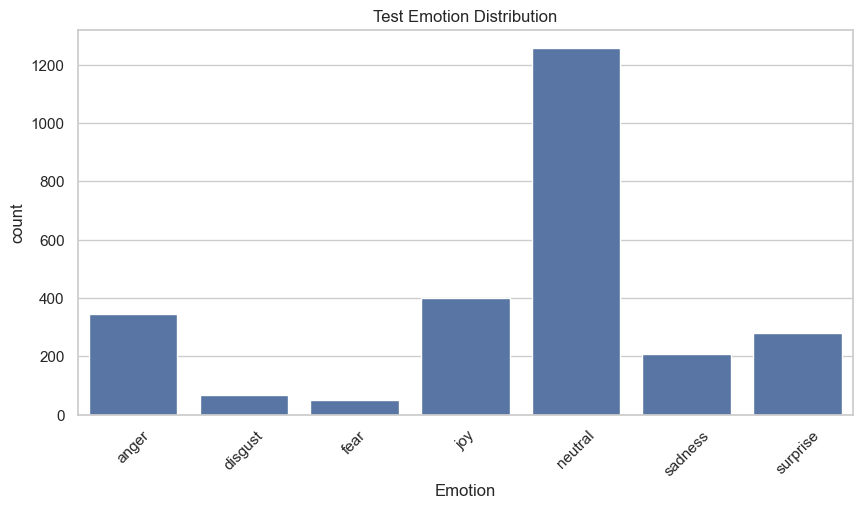

In [4]:
def plot_emotion_distribution(df, title):
    plt.figure(figsize=(10,5))
    sns.countplot(x='Emotion', data=df, order=sorted(df['Emotion'].unique()))
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

plot_emotion_distribution(train_df, "Train Emotion Distribution")
plot_emotion_distribution(dev_df, "Dev Emotion Distribution")
plot_emotion_distribution(test_df, "Test Emotion Distribution")


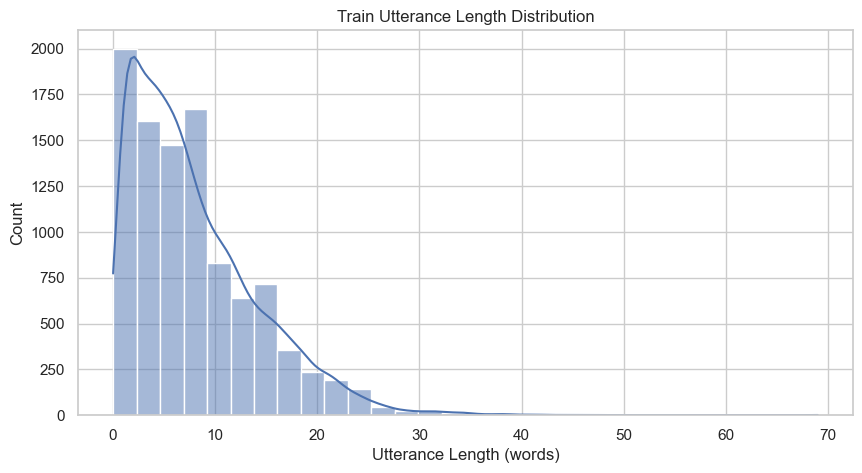

Mean: 7.93 words, Median: 6.0 words


In [5]:
def plot_utterance_length(df, title):
    lengths = df['Cleaned_Utterance'].apply(lambda x: len(x.split()))
    plt.figure(figsize=(10,5))
    sns.histplot(lengths, bins=30, kde=True)
    plt.title(title)
    plt.xlabel("Utterance Length (words)")
    plt.show()
    print(f"Mean: {lengths.mean():.2f} words, Median: {lengths.median()} words")

plot_utterance_length(train_df, "Train Utterance Length Distribution")


In [6]:
def common_words(df, emotion=None, top_n=15):
    if emotion:
        texts = df[df['Emotion'] == emotion]['Cleaned_Utterance']
    else:
        texts = df['Cleaned_Utterance']
    all_words = ' '.join(texts).split()
    counter = Counter(all_words)
    return counter.most_common(top_n)

print("Top words overall:", common_words(train_df))

for emo in all_emotions:
    print(f"\nTop words for '{emo}': ", common_words(train_df, emo))


Top words overall: [('you', 3067), ('i', 3020), ('the', 1854), ('to', 1627), ('a', 1557), ('and', 1192), ('it', 1063), ('oh', 1063), ('that', 1015), ('what', 821), ('im', 794), ('is', 760), ('me', 751), ('no', 741), ('this', 733)]

Top words for 'anger':  [('you', 431), ('i', 374), ('the', 247), ('to', 218), ('and', 174), ('a', 168), ('it', 157), ('that', 143), ('me', 137), ('no', 130), ('my', 111), ('is', 110), ('this', 106), ('im', 106), ('dont', 105)]

Top words for 'disgust':  [('you', 96), ('i', 78), ('the', 74), ('a', 69), ('to', 51), ('and', 44), ('that', 44), ('oh', 41), ('no', 35), ('it', 33), ('my', 31), ('with', 26), ('of', 25), ('dont', 25), ('in', 24)]

Top words for 'fear':  [('i', 135), ('you', 82), ('to', 57), ('a', 45), ('no', 44), ('dont', 39), ('oh', 37), ('im', 37), ('and', 33), ('the', 33), ('it', 33), ('me', 31), ('just', 30), ('do', 30), ('not', 28)]

Top words for 'joy':  [('i', 538), ('you', 504), ('the', 289), ('to', 251), ('a', 249), ('oh', 233), ('and', 223)

In [7]:
output_dir = data_dir
os.makedirs(output_dir, exist_ok=True)
train_df.to_csv(os.path.join(output_dir, 'formatted_train_sent_emo.csv'), index=False)
dev_df.to_csv(os.path.join(output_dir, 'formatted_dev_sent_emo.csv'), index=False)
test_df.to_csv(os.path.join(output_dir, 'formatted_test_sent_emo.csv'), index=False)
print("Saved processed datasets.")


Saved processed datasets.
